# Imports for Python libraries

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn
from torch import optim
from IPython.display import display, HTML

# Set up the mini-batch size

In [2]:
# Edit code here to change the batch size.
mini_batch_size = 64

# Download the dataset, pre-process, and divide into mini-batches

In [3]:
### Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,)),])
### Download and load the training data
trainset = datasets.MNIST('./MNIST_data', download=True, train=True, transform=transform)
valset = datasets.MNIST('./MNIST_data', download=True, train=False, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=mini_batch_size, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=mini_batch_size, shuffle=True)
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


# Explore the processed data

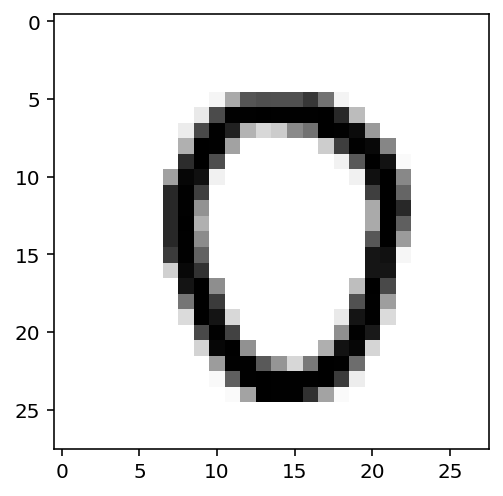

In [4]:
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r'); # Change the index of images[] to get different numbers

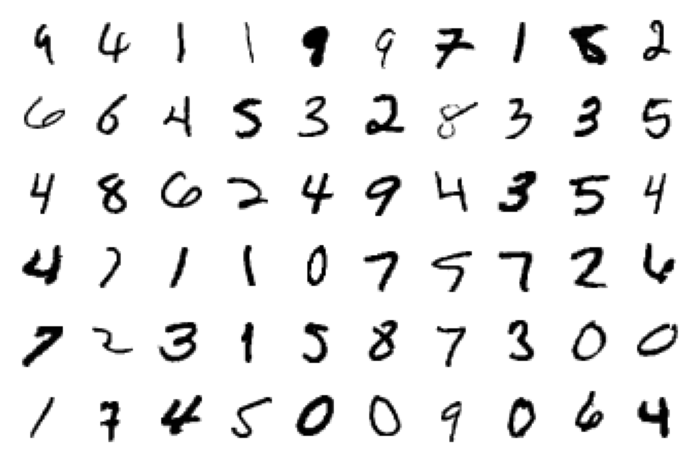

In [5]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

# Set up the neural network

In [6]:
### Layer details for the neural network
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

### Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax()
)


# Set up the optimization model

In [7]:
# Edit code here to change the optimization model.
optimizer = optim.Adam(model.parameters())

# Set up the loss function to optimize over

In [8]:
time0 = time()
epochs = 15
criterion = nn.NLLLoss() # Negative log likelihood loss function is used
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images) # Model spits out the probability of image belonging to different classes
loss = criterion(logps, labels)

# Train the neural network

In [9]:
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)

        # Training pass
        optimizer.zero_grad()

        output = model(images)
        loss = criterion(output, labels)

        #This is where the model learns by backpropagating
        loss.backward()

        #And optimizes its weights here
        optimizer.step()

        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
print("\nTraining Time (in minutes) =",(time()-time0)/60)

Epoch 0 - Training loss: 0.4178721543743031
Epoch 1 - Training loss: 0.2054735009214962
Epoch 2 - Training loss: 0.14973730063423324
Epoch 3 - Training loss: 0.11983748539579289
Epoch 4 - Training loss: 0.10295597614565574
Epoch 5 - Training loss: 0.09050264844655005
Epoch 6 - Training loss: 0.07887232894830501
Epoch 7 - Training loss: 0.07146782689948263
Epoch 8 - Training loss: 0.06499064495183353
Epoch 9 - Training loss: 0.05769804432219428
Epoch 10 - Training loss: 0.0554761213269323
Epoch 11 - Training loss: 0.05037446383024201
Epoch 12 - Training loss: 0.044530475692044616
Epoch 13 - Training loss: 0.04421654749125652
Epoch 14 - Training loss: 0.03889507298851867

Training Time (in minutes) = 2.6339446663856507


# Evaluate the trained neural network

In [13]:
correct_count, all_count = 0, 0
for images,labels in valloader:
    for i in range(len(labels)):
        img = images[i].view(1, 784)
        # Turn off gradients to speed up this part
        with torch.no_grad():
            logps = model(img)

        # Output of the network are log-probabilities, need to take exponential for probabilities
        ps = torch.exp(logps)
        probab = list(ps.numpy()[0])
        pred_label = probab.index(max(probab))
        true_label = labels.numpy()[i]
        if(true_label == pred_label):
            correct_count += 1
        all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 10000

Model Accuracy = 0.9752


# Predict using the trained neural network

In [14]:
def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.'''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

Predicted Digit = 2


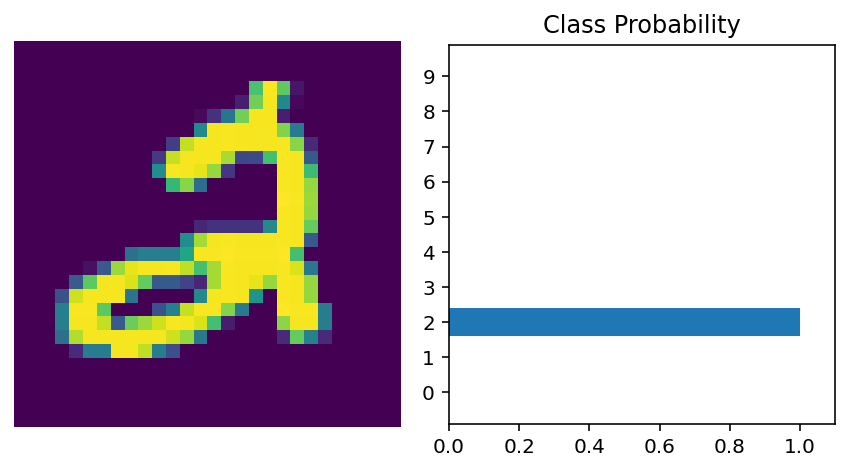

In [24]:
images, labels = next(iter(valloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)
# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
view_classify(img.view(1, 28, 28), ps)